In [ ]:
import numpy as np
from scipy.stats import norm
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Define the normal distribution parameters
mean = 1.5
clipped = True

# Define the function sigma - sigma^2
def func(sigma, dist, shift):
    return dist * (sigma - shift) - (sigma - shift)**2
    #return sigma - sigma**2

def g_sigma(sigma, scale):
    return norm.pdf(sigma, mean, scale)  # Shifted by 0

In [ ]:
samples = np.clip(np.random.normal(1.5, 0.8, size=10**6), 0, 3)

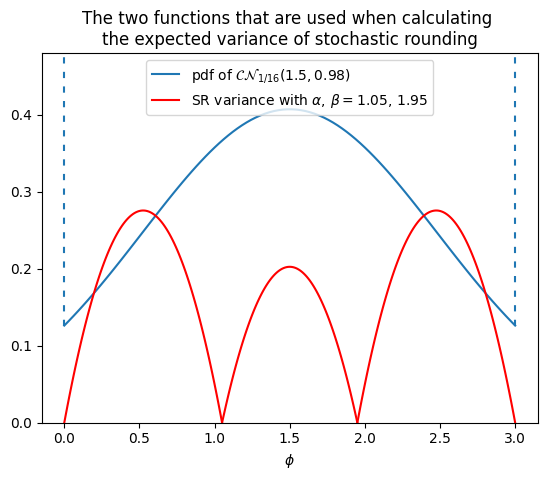

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# define the mean and standard deviation
mu = 1.5
sigma = 0.98

# define the range
x = np.linspace(0, 3, 100)

# calculate the pdf (probability density function)
y = norm.pdf(x, mu, sigma) 

plt.plot(x, y, label='pdf of $\\mathcal{CN}_{1/16}(1.5, 0.98)$')
plt.plot((0, 0), (y[0], 1), c='C0', linestyle=(0, (3, 4)))
plt.plot((3, 3), (y[-1], 1), c='C0', linestyle=(0, (3, 4)))

dist = [1.05, 0.9, 1.05]
shift = [0, 1.05, 1.95]

# your additional plots
for i in range(3):
        dist_val = dist[i]
        shift_val = shift[i]

        sigmas = np.linspace(shift_val, shift_val+dist_val, 100)
        vals = func(sigmas, dist_val, shift_val)
        if i == 1:
            plt.plot(sigmas, vals, c='r', label='SR variance with $\\alpha,\,\\beta = 1.05,\\,1.95$')
        else:
            plt.plot(sigmas, vals, c='r')


plt.title("The two functions that are used when calculating \nthe expected variance of stochastic rounding")
plt.legend()
plt.ylim(0, 0.48)
plt.xlabel('$\phi$')
plt.savefig('exp_funcs.png', dpi=300)

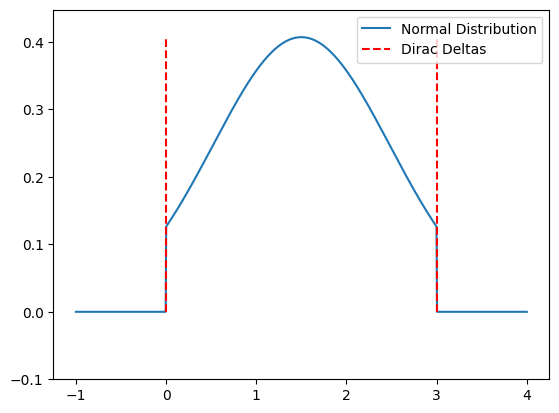

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# range of x values
x = np.linspace(-1, 4, 1000)

# normal distribution between 0 and 3
mu = 1.5
sigma = 0.98
y = np.where((x > 0) & (x < 3), norm.pdf(x, mu, sigma), 0)

# plot the normal distribution
plt.plot(x, y, label='Normal Distribution')

# add vertical lines representing the Dirac delta functions at 0 and 3
# scale the height to match the maximum value in the PDF
height = max(y)
plt.vlines([0, 3], 0, height, colors='r', linestyles='dashed', label='Dirac Deltas')

plt.ylim(-0.1, height * 1.1)  # adjust as needed
plt.legend()
plt.show()
